# Problem Description
### this project allow you to analyse any Commercial data ,Clean it and visualize it .
### Bishoy Shehata Morris -- 20191616066

## Packages  

In [87]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)

from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy
from sklearn.linear_model import Ridge

### Read data base

In [88]:
df = pd.read_csv("Online Retail3.csv", dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])
df.shape

(541909, 8)

In [89]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## EDA

In [90]:
missing_percentage =df.isnull().sum() * 100 / len(df)
print(round(missing_percentage,2))

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64


In [91]:
# Removing None Customer IDs ... save clean dataframe with same variable `df`
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["CustomerID"], inplace=True)

In [92]:
# Just for Checking 
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Q1: Which Country makes the most transactions?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'France'),
  Text(3, 0, 'EIRE'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Belgium'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Portugal'),
  Text(9, 0, 'Australia'),
  Text(10, 0, 'Norway'),
  Text(11, 0, 'Italy'),
  Text(12, 0, 'Channel Islands'),
  Text(13, 0, 'Finland'),
  Text(14, 0, 'Cyprus'),
  Text(15, 0, 'Sweden'),
  Text(16, 0, 'Austria'),
  Text(17, 0, 'Denmark'),
  Text(18, 0, 'Japan'),
  Text(19, 0, 'Poland')])

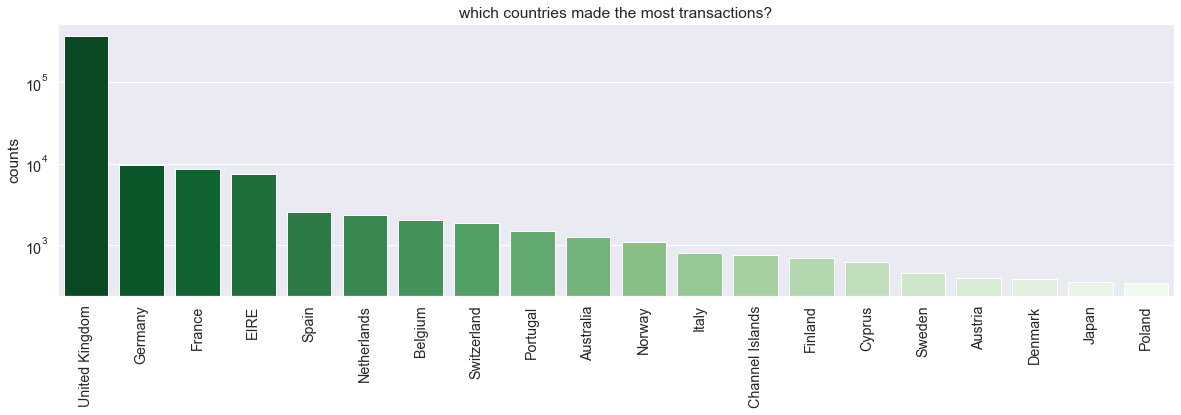

In [93]:
plt.figure(figsize=(20,5))
countries=df['Country'].value_counts()[:20].index

sns.countplot(x='Country',data=df,palette = "Greens_r",order=countries)
plt.yscale('log')
plt.ylabel('counts')
plt.xlabel('')
plt.title('which countries made the most transactions?')
plt.xticks(rotation = 90)


### Q2: Show the Top 10 Customers how made the largest Revenue

### Q6: Calculate the Total Revenue for each Row

In [94]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]
df_top_10 = {'CustomerID':df.groupby('CustomerID').Revenue.sum().sort_values(ascending=False)[:10].index,
            'Revenue':df.groupby('CustomerID').Revenue.sum().sort_values(ascending=False)[:10].values}
df_top_10 = pd.DataFrame(df_top_10)
df_top_10

,CustomerID,Revenue
0,14646,279489.02
1,18102,256438.49
2,17450,187482.17
3,14911,132572.62
4,12415,123725.45
5,14156,113384.14
6,17511,88125.38
7,16684,65892.08
8,13694,62653.10
9,15311,59419.34


### Q3: Show Top 5 frequent Customers¶

In [95]:
df_top_cust = df.groupby(['CustomerID'])['InvoiceNo'].count().reset_index(name='Frequency').sort_values(['Frequency'], ascending=False)[:5]
df_top_cust = pd.DataFrame(df_top_cust).reset_index(drop=True)
df_top_cust

,CustomerID,Frequency
0,17841,7983
1,14911,5903
2,14096,5128
3,12748,4642
4,14606,2782


In [96]:
f"{df.shape[0]:,}"

'406,829'

### Q4: Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏

Text(0, 0.5, 'count')

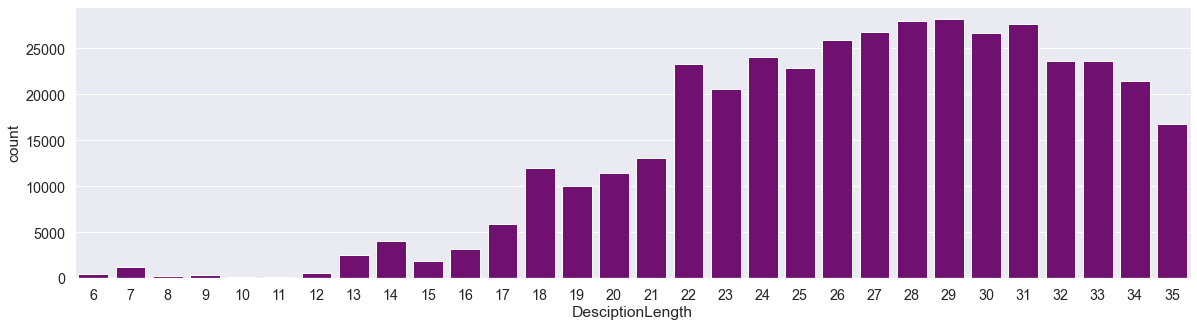

In [97]:
plt.figure(figsize=(20,5))
describe=df['Description'].str.len()[6:36].index
sns.countplot(x=df['Description'].str.len(),data=df,color="purple",order=describe)
plt.xlabel('DesciptionLength')
plt.ylabel('count')

### Q5: Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒 feature¶

### P.S: Date is based on Year, Month & Day features

In [98]:
df['Year'] = df['InvoiceDate'].dt.year
df['Quarter'] = df['InvoiceDate'].dt.quarter
df['Month'] = df['InvoiceDate'].dt.month
df['Week'] = df['InvoiceDate'].dt.isocalendar().week
df['Weekday'] =df['InvoiceDate'].dt.dayofweek
df['Day'] = df['InvoiceDate'].dt.day
df['Dayofyear'] = df['InvoiceDate'].dt.dayofyear
df['Date'] =  df['Year'].astype(str)+"-"+df['Month'].astype(str)+"-"+df['Day'].astype(str)

In [99]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,12,48,2,1,335,2010-12-1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,12,48,2,1,335,2010-12-1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-1


### Q7 & Q8: Aggregate Revenue & Quantity across the grouped_features

In [100]:
grouped_features = ['Date','Year','Quarter','Month','Week','Weekday','Dayofyear','Day','StockCode']
df.groupby(grouped_features,as_index=False)[['Quantity','Revenue']].sum().head()

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Quantity,Revenue
0,2010-12-1,2010,4,12,48,2,335,1,10002,60,51.00
1,2010-12-1,2010,4,12,48,2,335,1,10125,2,1.70
2,2010-12-1,2010,4,12,48,2,335,1,10133,5,4.25
3,2010-12-1,2010,4,12,48,2,335,1,15044B,1,2.95
4,2010-12-1,2010,4,12,48,2,335,1,15056BL,20,113.00
